In [ ]:
EDA:
    L0:
        use basics of pandas head,tail,info,desc,isnull,duplicate
    L1: (univariate EDA) Select one column analysing the data
        cat:countplot,bar,pie
        num:hist,boxplot
    L2: (Bivariate EDA) select two columns and analysing
        cat vs cat:countplot,bar,pie
        cat vs num:lineplot,hist
        num vs num:scatter,barplot
    L3:(Multivariate)select more than two columns and analysing
        heatmap,corr,scatter,pairplot
        
    

In [ ]:
Data Dictionary
-----------------------
SK_ID_CURR: Unique identifier for each individual in the dataset.
TARGET: Binary variable indicating whether the individual had difficulty repaying a loan (1) or not (0).
NAME_CONTRACT_TYPE: Type of loan contract, such as "Cash loans" or "Revolving loans".
GENDER: Gender of the individual.
Car: Binary variable indicating whether the individual owns a car (1) or not (0).
House: Binary variable indicating whether the individual owns a house (1) or not (0).
CNT_CHILDREN: Number of children the individual has.
AMT_INCOME_TOTAL: Total annual income of the individual.
AMT_CREDIT: Total credit amount of the loan.
AMT_GOODS_PRICE: Price of the goods for which the loan is given.
NAME_TYPE_SUITE: Who was accompanying the individual when applying for the loan.
NAME_INCOME_TYPE: Type of income the individual receives (e.g., "Working", "Pensioner").
NAME_EDUCATION_TYPE: Highest level of education the individual has completed.
NAME_FAMILY_STATUS: Family status of the individual (e.g., "Married", "Single").
DAYS_EMPLOYED: Number of days the individual has been employed (could be negative).
MOBILE, WORK_PHONE, HOME_PHONE: Binary variables indicating the presence of a mobile, work phone, and home phone, respectively.
MOBILE_REACHABLE: Binary variable indicating whether the individual can be reached by mobile phone (1) or not (0).
FLAG_EMAIL: Binary variable indicating whether the individual has an email address (1) or not (0).
OCCUPATION_TYPE: Type of occupation of the individual.
CNT_FAM_MEMBERS: Number of family members.
APPLICATION_DAY: Day of the month when the loan application was submitted.
TOTAL_DOC_SUBMITTED: Total number of documents submitted with the loan application.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD AND EXPLORE DATA

In [2]:
loan_data=pd.read_csv(r'C:\Users\fathi\Downloads\Bank_Loan_Defaulter (1).csv')

In [8]:
loan_data.shape

(100000, 24)

In [3]:
loan_data.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
GENDER                  object
Car                     object
House                   object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_EMPLOYED            int64
MOBILE                   int64
WORK_PHONE               int64
HOME_PHONE               int64
MOBILE_REACHABLE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
APPLICATION_DAY         object
TOTAL_DOC_SUBMITTED      int64
dtype: object

In [9]:
loan_data.size

2400000

In [15]:
loan_data.ndim

2

In [3]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [4]:
loan_data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [6]:
loan_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,9.991900e+04,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000
mean,158006.140860,0.080930,0.417390,1.694261e+05,5.990034e+05,5.383451e+05,63292.222060,0.999990,0.82128,0.199740,0.997990,0.056190,2.155672,0.931210
std,33481.166996,0.272729,0.721014,3.835007e+05,4.020520e+05,3.693977e+05,140839.697296,0.003162,0.38312,0.399807,0.044788,0.230289,0.908897,0.343917
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129076.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157877.000000,0.000000,0.000000,1.440000e+05,5.130405e+05,4.500000e+05,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186982.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14.000000,4.000000


# DATA CLEANING

In [23]:
#check null values 
loan_data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [3]:
#null value treatment
loan_data['AMT_GOODS_PRICE'].fillna(loan_data['AMT_GOODS_PRICE'].mode()[0],inplace=True)
loan_data['NAME_TYPE_SUITE'].fillna(loan_data['NAME_TYPE_SUITE'].mode()[0],inplace=True)
loan_data['OCCUPATION_TYPE'].fillna(loan_data['OCCUPATION_TYPE'].mode()[0],inplace=True)
loan_data['CNT_FAM_MEMBERS'].fillna(loan_data['CNT_FAM_MEMBERS'].mode()[0],inplace=True)

In [24]:
#check duplicates
loan_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [4]:
#identify the categorical and numerical data
cat=[]
num=[]
def data_type(df):
    for col in df.columns:
        if df[col].nunique()<30:
            cat.append(col)
        else:
            num.append(col)
            
data_type(loan_data)

In [5]:
cat

['TARGET',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'APPLICATION_DAY',
 'TOTAL_DOC_SUBMITTED']

In [6]:
num

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED']

In [7]:
def mode_cat(cat):
    for col in cat:
        print(f'{col},Mode={loan_data[col].mode()[0]},Nunique {loan_data[col].nunique()} , Missing_Val {loan_data[col].isnull().sum()}')
        
mode_cat(cat)    

TARGET,Mode=0,Nunique 2 , Missing_Val 0
NAME_CONTRACT_TYPE,Mode=Cash loans,Nunique 2 , Missing_Val 0
GENDER,Mode=F,Nunique 3 , Missing_Val 0
Car,Mode=N,Nunique 2 , Missing_Val 0
House,Mode=Y,Nunique 2 , Missing_Val 0
CNT_CHILDREN,Mode=0,Nunique 12 , Missing_Val 0
NAME_TYPE_SUITE,Mode=Unaccompanied,Nunique 7 , Missing_Val 0
NAME_INCOME_TYPE,Mode=Working,Nunique 8 , Missing_Val 0
NAME_EDUCATION_TYPE,Mode=Secondary / secondary special,Nunique 5 , Missing_Val 0
NAME_FAMILY_STATUS,Mode=Married,Nunique 6 , Missing_Val 0
MOBILE,Mode=1,Nunique 2 , Missing_Val 0
WORK_PHONE,Mode=1,Nunique 2 , Missing_Val 0
HOME_PHONE,Mode=0,Nunique 2 , Missing_Val 0
MOBILE_REACHABLE,Mode=1,Nunique 2 , Missing_Val 0
FLAG_EMAIL,Mode=0,Nunique 2 , Missing_Val 0
OCCUPATION_TYPE,Mode=Laborers,Nunique 18 , Missing_Val 0
CNT_FAM_MEMBERS,Mode=2.0,Nunique 12 , Missing_Val 0
APPLICATION_DAY,Mode=TUESDAY,Nunique 7 , Missing_Val 0
TOTAL_DOC_SUBMITTED,Mode=1,Nunique 5 , Missing_Val 0


In [ ]:
#univariate EDA

<Axes: xlabel='TARGET', ylabel='count'>

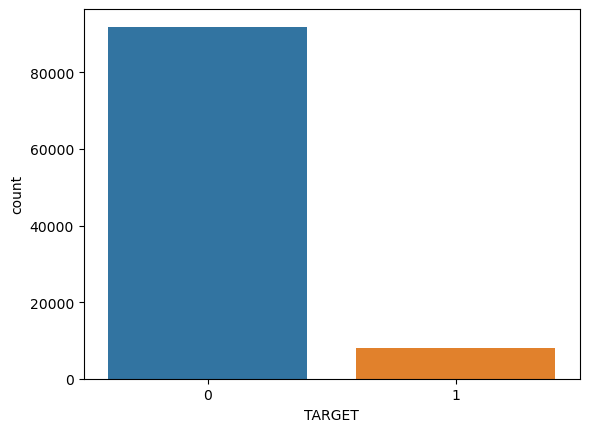

In [8]:
#CAT
sns.countplot(x=loan_data['TARGET'])

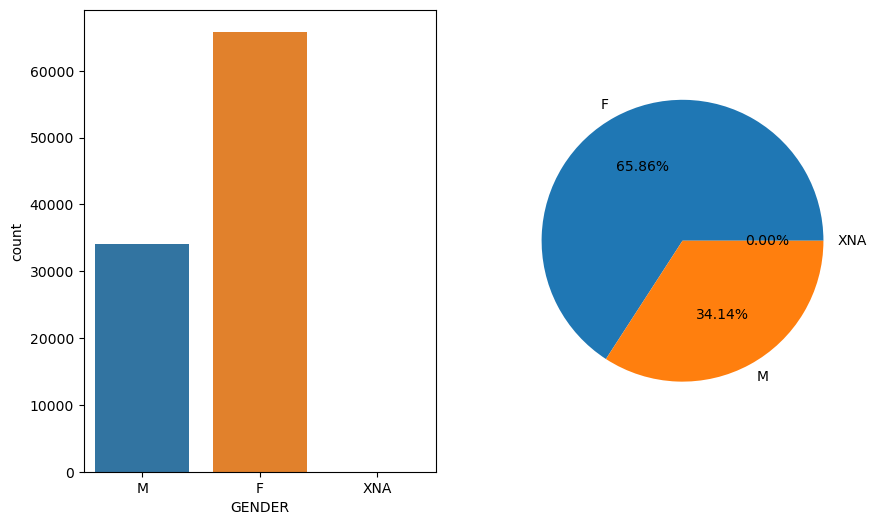

In [11]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,6))
sns.countplot(x=loan_data['GENDER'],ax=ax[0])
plt.pie(x=loan_data['GENDER'].value_counts().values,labels=loan_data['GENDER'].value_counts().index,autopct='%.2f%%')
plt.show()

<Axes: xlabel='Car', ylabel='count'>

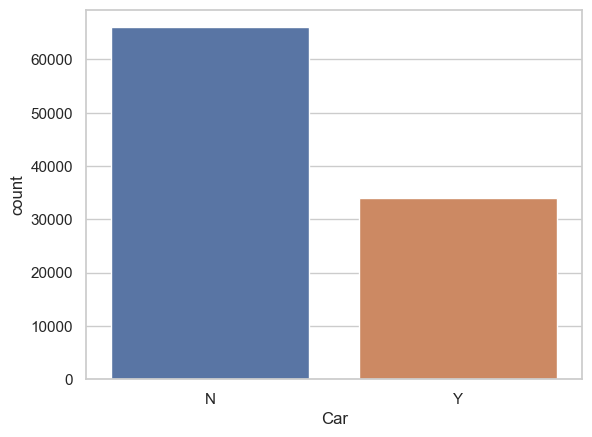

In [18]:
sns.countplot(x=loan_data['Car'])

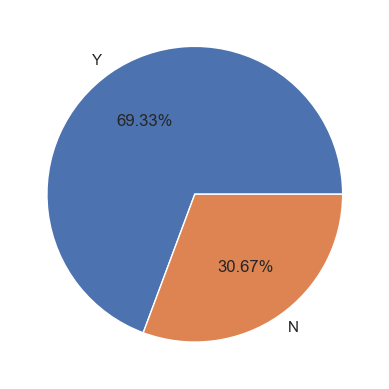

In [19]:
plt.pie(x=loan_data['House'].value_counts().values,labels=loan_data['House'].value_counts().index,autopct='%.2f%%')
plt.show()

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

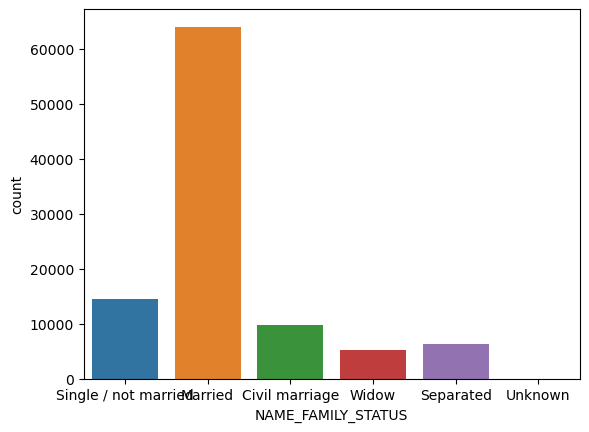

In [7]:
sns.countplot(x=loan_data['NAME_FAMILY_STATUS'])

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

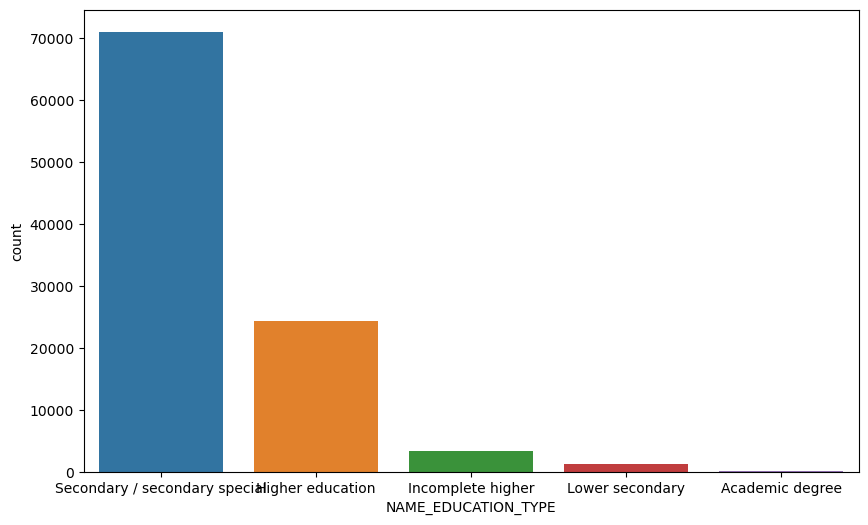

In [8]:
plt.subplots(figsize=(10,6))
sns.countplot(x=loan_data['NAME_EDUCATION_TYPE'])
#plt.xticks(rotation=45)


In [11]:
num


['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED']

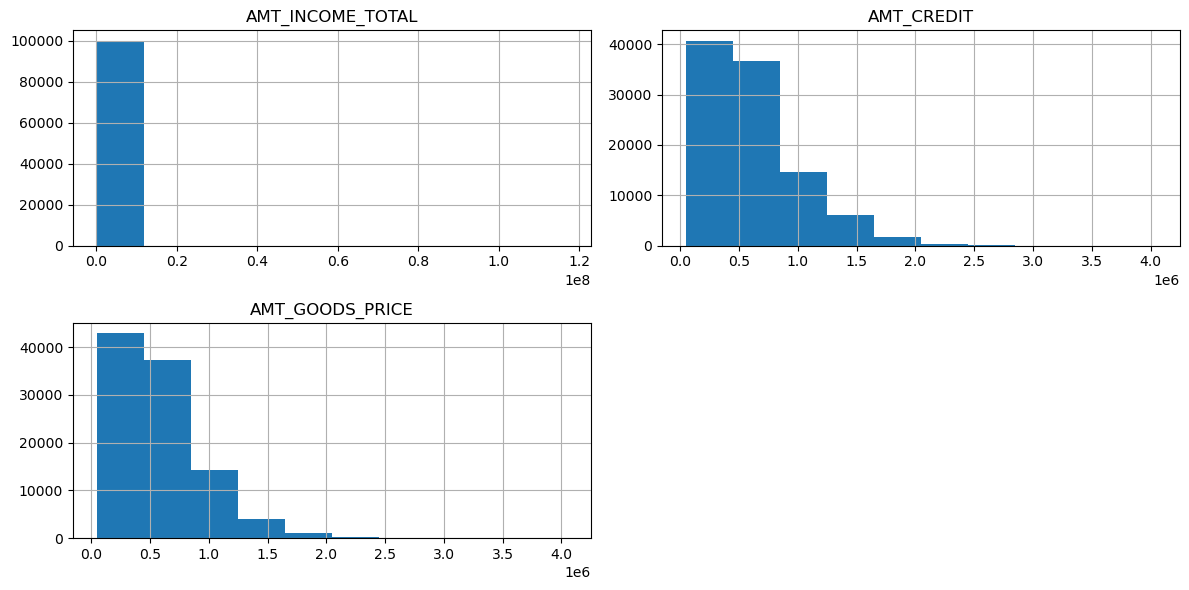

In [9]:
#plot histogram to visulaize the distributions of numerical variables:
loan_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE']].hist(figsize=(12, 6))
plt.tight_layout()
plt.show()

<Axes: xlabel='AMT_GOODS_PRICE'>

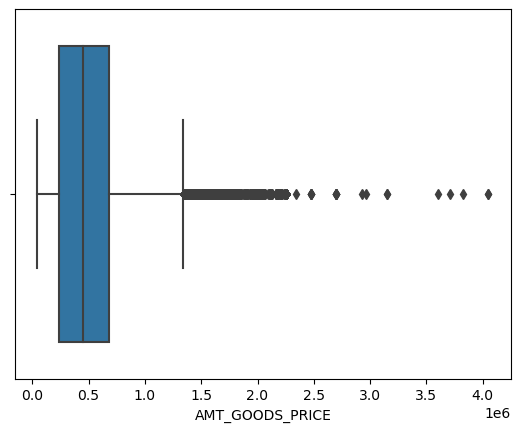

In [10]:
sns.boxplot(x=loan_data['AMT_GOODS_PRICE'])

# Bivariate EDA (select two columns and analysing)
        #cat vs cat:countplot,bar,pie
        #cat vs num:lineplot,hist
        #num vs num:scatter,barplot

In [ ]:
#cat vs cat

<Axes: xlabel='TARGET', ylabel='count'>

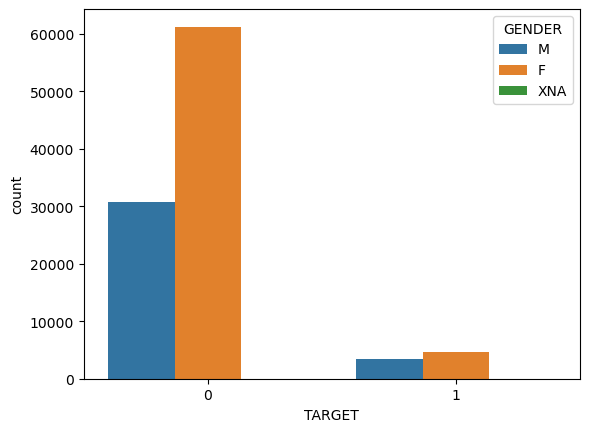

In [12]:
sns.countplot(x=loan_data['TARGET'],hue=loan_data['GENDER'])

<Axes: xlabel='TARGET', ylabel='count'>

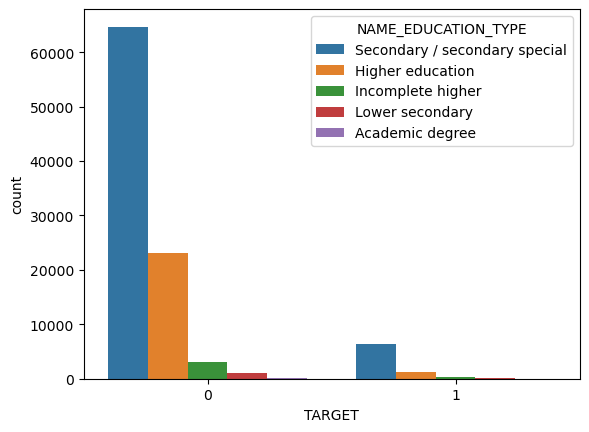

In [13]:
sns.countplot(x=loan_data['TARGET'],hue=loan_data['NAME_EDUCATION_TYPE'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Single / not married'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Civil marriage'),
  Text(3, 0, 'Widow'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Unknown')])

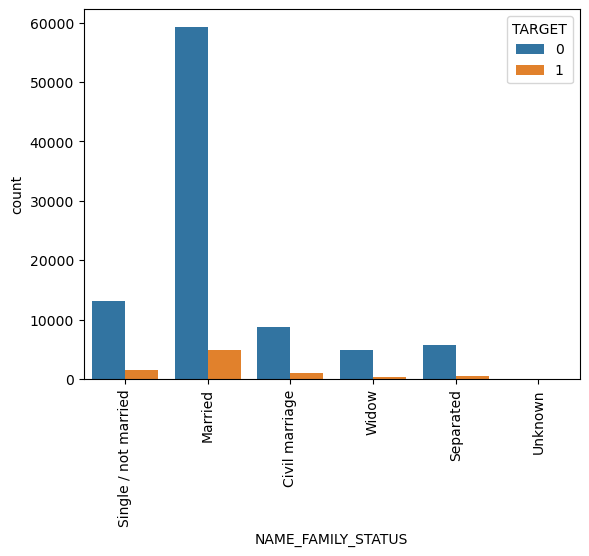

In [16]:
sns.countplot(x=loan_data['NAME_FAMILY_STATUS'],hue=loan_data['TARGET'])
plt.xticks(rotation=90)

In [ ]:
#num vs num

0.99


<Axes: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

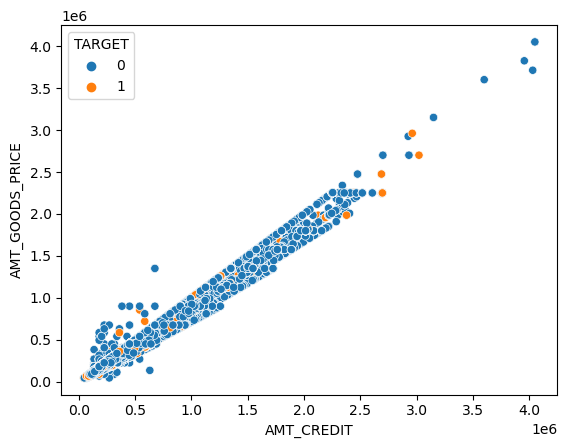

In [17]:
cor=round(loan_data['AMT_CREDIT'].corr(loan_data['AMT_GOODS_PRICE']),2)
print(cor)
sns.scatterplot(x=loan_data['AMT_CREDIT'] ,y=loan_data['AMT_GOODS_PRICE'],hue=loan_data['TARGET'],legend=cor)

In [ ]:
#cat vs num

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

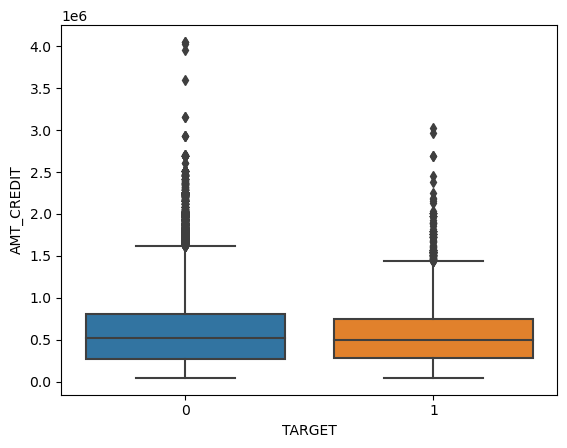

In [19]:
sns.boxplot(data=loan_data,x='TARGET',y='AMT_CREDIT')

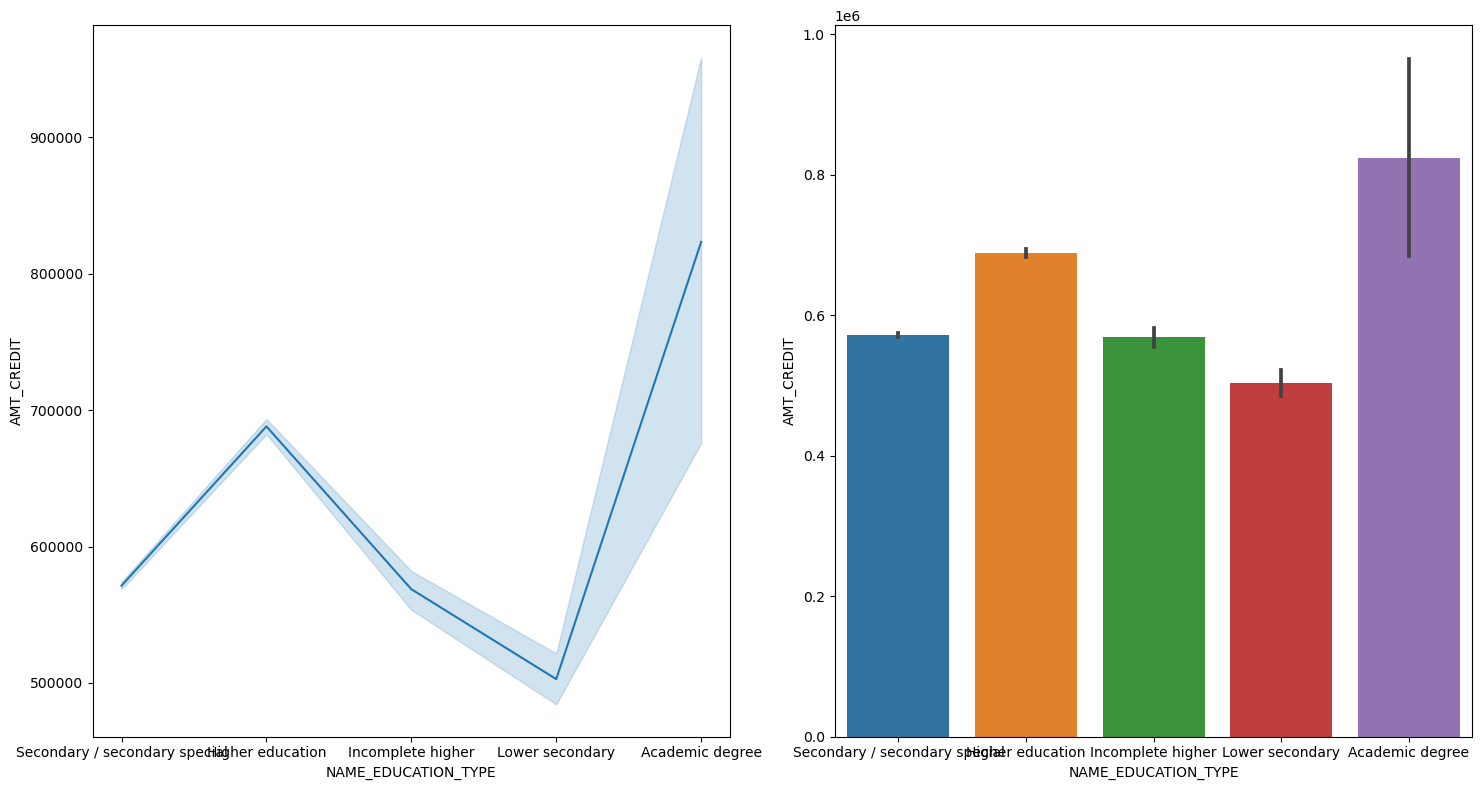

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.lineplot(data=loan_data,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',ax=ax[0])
sns.barplot(data=loan_data,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',ax=ax[1])
plt.tight_layout()
plt.show()

# Mutivariate Analysis

In [34]:
x=loan_data.loc[:,num]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


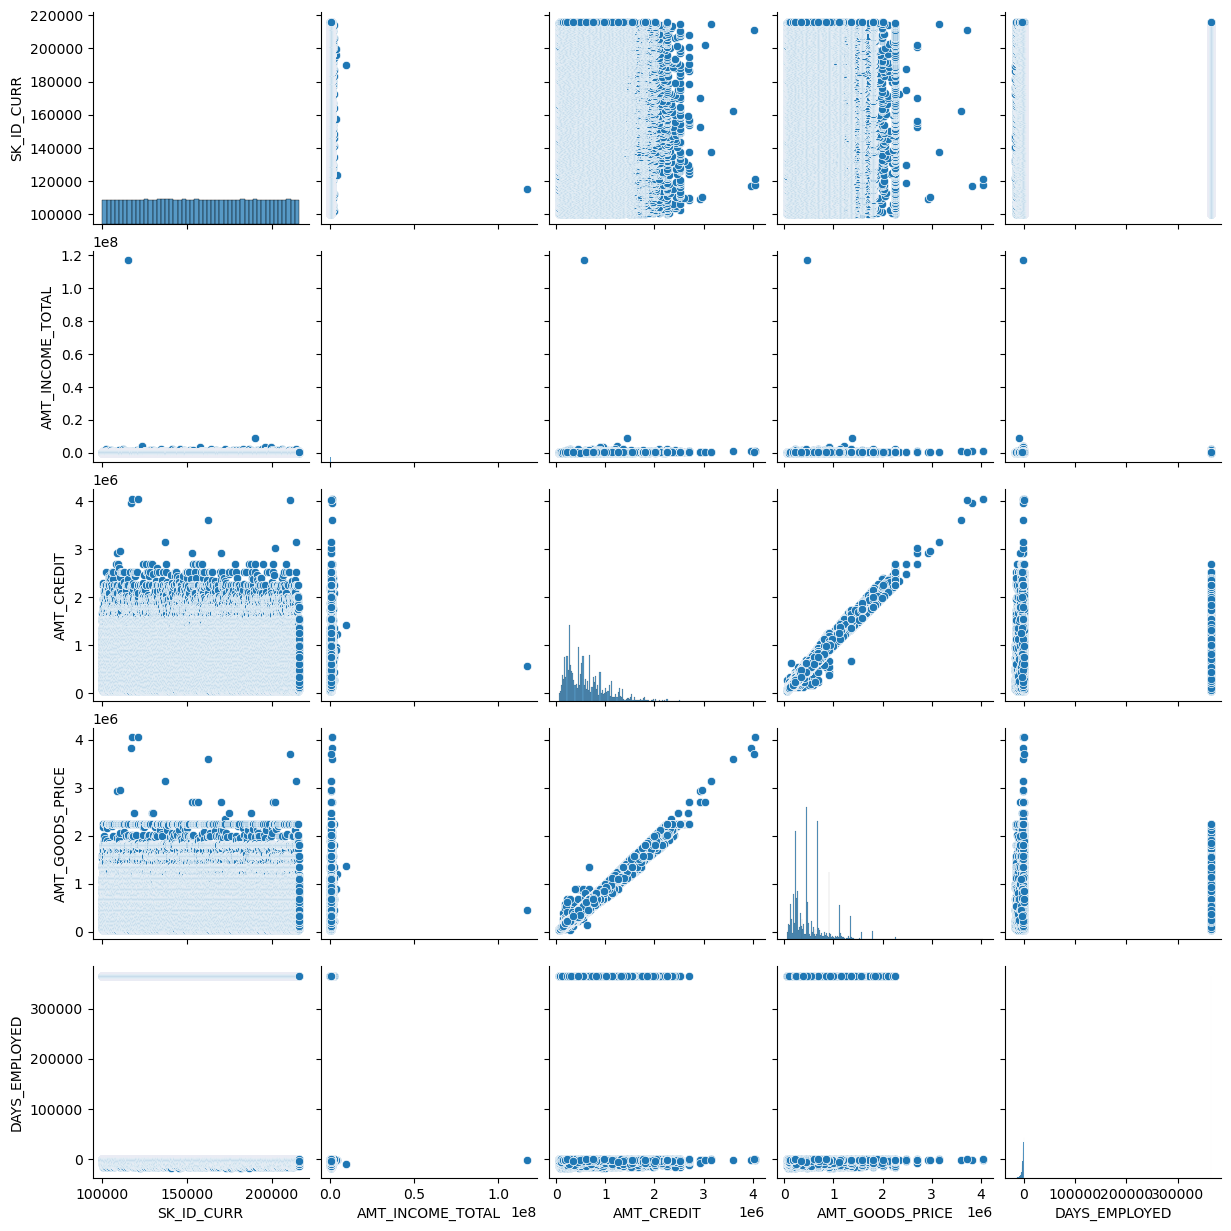

In [35]:
sns.pairplot(x)

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE
AMT_INCOME_TOTAL          1.000000    0.097095         0.098513
AMT_CREDIT                0.097095    1.000000         0.986911
AMT_GOODS_PRICE           0.098513    0.986911         1.000000


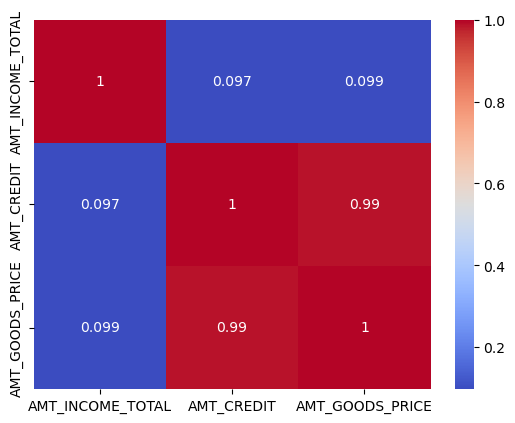

In [33]:
# Correlation Analysis:
correlation_matrix=loan_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()